# Analyzing Farmburg's A/B Test

Brian is a Product Manager at FarmBurg, a company that makes a farming simulation social network game. In the FarmBurg game, you can plow, plant, and harvest different crops. ​Brian has been conducting an A/B Test with three different variants, and he wants you to help him analyze the results. Using the Python modules pandas and SciPy, you will help him make some important business decisions!

In [1]:
import pandas as pd
import numpy as np

# Read in the `new_clicks.csv` file as `abdata`
abdata = pd.read_csv('new_clicks.csv')

## Project Requirements

1. Brian ran an A/B test with three different groups: A, B, and C. He has provided us with a CSV file of his results named **new_clicks.csv**. It has the following columns:

    * `user_id`: a unique id for each visitor to the FarmBurg site
    * `group`: either `'A'`, `'B'`, or `'C'` depending on which group the visitor was assigned to
    * `is_purchase`: either `'Yes'` if the visitor made a purchase or `'No'` if they did not.

    We have already imported `pandas` as `pd` and loaded **new_clicks.csv** as `abdata`. Inspect the data using the `.head()` method.

In [2]:
abdata.head()

,user_id,group,is_purchase
0,8e27bf9a,A,No
1,eb89e6f0,A,No
2,7119106a,A,No
3,e53781ff,A,No
4,02d48cf1,A,Yes


2. Note that we have two categorical variables: `group` and `is_purchase`. We are interested in whether visitors are more likely to make a purchase if they are in any one group compared to the others. Because we want to know if there is an association between two categorical variables, we’ll start by using a Chi-Square test to address our question.

    In order to run a Chi-Square test, we first need to create a contingency table of the variables `group` and `is_purchase`. Use `pd.crosstab()` to create this table and name the result `xtab`, then print it out. Which group appears to have the highest number of purchases?

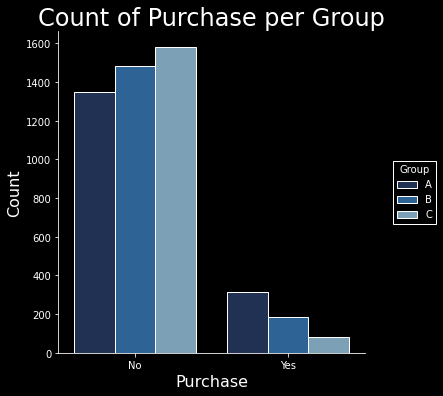

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

PROPS = {
    'boxprops': {'edgecolor':'white'},
    'medianprops': {'color':'white'},
    'whiskerprops': {'color':'white'},
    'capprops': {'color':'white'},
    'flierprops': {
                    'markerfacecolor':'white',
                    'markeredgecolor': 'white',
                    'markersize': 12
                }
}

EXOTIC_ORCHIDS_COLOR_SCHEME = {
    'dark_blue': '#192E5B',
    'medium_blue': '#1D65A6',
    'light_blue': '#72A2C0',
    'green': '#00743F',
    'yellow': '#F2A104'   
}

my_pal = {
    "A": EXOTIC_ORCHIDS_COLOR_SCHEME['dark_blue'],
    "B": EXOTIC_ORCHIDS_COLOR_SCHEME['medium_blue'],
    "C": EXOTIC_ORCHIDS_COLOR_SCHEME['light_blue']
}

plt.style.use('dark_background')

sns.catplot(
    kind='count',
    x='is_purchase',
    hue='group',
    data=abdata,
    palette=my_pal,
    edgecolor='white',
    legend=False
)
plt.xlabel("Purchase", size=16)
plt.ylabel("Count", size=16)
plt.title("Count of Purchase per Group", size=24)
legend = plt.legend(title="Group", labels=["A", "B", "C"], fancybox=False, loc="center right", bbox_to_anchor=(1.25, 0.5))
frame = legend.get_frame()
frame.set_facecolor('black')
frame.set_edgecolor('white')
frame.set_alpha(1) 
plt.show()

3. To conduct the Chi-Square Test, import `chi2_contingency` from `scipy.stats`.

    Then, use the function `chi2_contingency` with the data in `xtab` to calculate the p-value. Remember that of the four values returned by `chi2_contingency`, the p-value is the second value.

    Save the p-value to a variable named `pval` and print the result. Using a significance threshold of 0.05, is there a significant difference in the purchase rate for groups A, B, and C?

In [4]:
xtab = pd.crosstab(abdata.group, abdata.is_purchase)
xtab

is_purchase,No,Yes
group,,
A,1350,316
B,1483,183
C,1583,83


In [5]:
from scipy.stats import chi2_contingency

significance_threshold = 0.05
_, pval, _, _ = chi2_contingency(xtab)
print(f'With a p-value of {pval:0.2e} the significance is {pval < significance_threshold}')

With a p-value of 2.41e-35 the significance is True


4. Our day is a little less busy than expected, so we decide to ask Brian about his test.

    **Us**: Hey Brian! What was that test you were running anyway?

    **Brian**: We are trying to get users to purchase a small FarmBurg upgrade package. It is called a microtransaction. We are not sure how much to charge for it, so we tested three different price points: $0.99 (group `'A'`), $1.99 (group `'B'`), and $4.99 (group `'C'`). It looks like significantly more people bought the upgrade package for $0.99, so I guess that is what we will charge.

    **Us**: Oh no! We should have asked you this before we did that Chi-Square test. That was not the right test at all. It is true that more people wanted to purchase the upgrade at $0.99; you probably expected that. What we really want to know is whether each price point allows us to make enough money that we can exceed some target goal. Brian, how much do you think it cost to build this feature?

    **Brian**: Hmm. I guess that we need to generate a minimum of $1000 in revenue per week in order to justify this project.

    **Us**: We have some work to do!

    In order to justify this feature, we will need to calculate the necessary purchase rate for each price point. Let us start by calculating the number of visitors to the site this week.

    It turns out that Brian ran his original test over the course of a week, so the number of visitors in `abdata` is equal to the number of visitors in a typical week. Calculate the number of visitors in the data and save the value in a variable named `num_visits`. Make sure to print the value.

In [6]:
num_visits = len(abdata)
num_visits

4998

5. Now that we know how many visitors we generally get each week (`num_visits`), we need to calculate the number of visitors who would need to purchase the upgrade package at each price point ($0.99, $1.99, $4.99) in order to generate Brian's minimum revenue target of $1,000 per week.

    To start, calculate the number of sales that would be needed to reach $1,000 dollars of revenue at a price point of $0.99. Save the result as `num_sales_needed_099` and print it out.

In [7]:
sales_target = 1000
num_sales_needed_099 = sales_target / 0.99
num_sales_needed_099

1010.1010101010102

6. Now that we know how many sales we need at a $0.99 price point, calculate the proportion of weekly visitors who would need to make a purchase in order to meet that goal. Remember that the number of weekly visitors is saved as `num_visits`. Save the result as `p_sales_needed_099` and print it out.

In [8]:
p_sales_needed_099 = num_sales_needed_099 / num_visits
p_sales_needed_099

0.20210104243717691

7. Repeat the steps from tasks 5 and 6 for the other price points ($1.99 and $4.99). Save the number of sales needed for each price point as `num_sales_needed_199` and `num_sales_needed_499`, respectively. Then, save the proportion of visits needed as `p_sales_needed_199` and `p_sales_needed_499`, respectively.

    Print out the proportions. Note that for higher price points, you will need to sell fewer upgrade packages in order to meet your minimum revenue target — so the proportions should decrease as the price points increase.

In [9]:
num_sales_needed_199 = sales_target / 1.99
p_sales_needed_199 = num_sales_needed_199 / num_visits
p_sales_needed_199

0.10054272965467594

In [10]:
num_sales_needed_499 = sales_target / 4.99
p_sales_needed_499 = num_sales_needed_499 / num_visits
p_sales_needed_499

0.040096198800161346

8. Now let us return to Brian's question. To start, we want to know if the percent of Group A (the $0.99 price point) that purchased an upgrade package is *significantly* greater than `p_sales_needed_099` (the percent of visitors who need to buy an upgrade package at $0.99 in order to make our minimum revenue target of $1,000).

    To answer this question, we want to focus on just the visitors in group A. Then, we want to compare the number of purchases in that group to `p_sales_needed_099`.

    Since we have a single sample of categorical data and want to compare it to a hypothetical population value, a binomial test is appropriate. In order to run a binomial test for group A, we need to know two pieces of information:

    * The number of visitors in group A (the number of visitors who were offered the $0.99 price point)
    * The number of visitors in Group A who made a purchase

    Calculate these two numbers and save them as `samp_size_099` and `sales_099`, respectively. Note that you can use the contingency table that you printed earlier to get these numbers OR you can use Python syntax.

In [11]:
samp_size_099 = np.sum(abdata.group == 'A')
sales_099 = np.sum((abdata.group == 'A') & (abdata.is_purchase == 'Yes'))
print(f'Sample size: {samp_size_099}, Sales: {sales_099}')

Sample size: 1666, Sales: 316


9. Calculate the sample size and number of purchases in group B (the $1.99 price point) and save them as `samp_size_199` and `sales_199`, respectively. Then do the same for group C (the $4.99 price point) and save them as `samp_size_499` and `sales_499`, respectively.

In [12]:
samp_size_199 = np.sum(abdata.group == 'B')
sales_199 = np.sum((abdata.group == 'B') & (abdata.is_purchase == 'Yes'))
print(f'Sample size: {samp_size_199}, Sales: {sales_199}')

Sample size: 1666, Sales: 183


In [13]:
samp_size_499 = np.sum(abdata.group == 'C')
sales_499 = np.sum((abdata.group == 'C') & (abdata.is_purchase == 'Yes'))
print(f'Sample size: {samp_size_499}, Sales: {sales_499}')

Sample size: 1666, Sales: 83


10. For Group A ($0.99 price point), perform a binomial test using `binom_test()` to see if the observed purchase rate is significantly greater than `p_sales_needed_099`. Remember that there are four inputs to `binom_test()`:

    * `x` will be the number of purchases for Group A
    * `n` will be the total number of visitors assigned group A
    * `p` will be the target percent of purchases for the $0.99 price point
    * `alternative` will indicate the alternative hypothesis for this test; in this case, we want to know if the observed purchase rate is significantly 'greater' than the purchase rate that results in the minimum revenue target.

    Save the results to `pvalue_A`, and print its value. Note that you will first need to import the `binom_test()` function from `scipy.stats` using the following line of code:
    ```
    from scipy.stats import binom_test
    ```

In [14]:
from scipy.stats import binom_test

pvalue_A = binom_test(x=sales_099, n=samp_size_099, p=p_sales_needed_099, alternative = 'greater')
print(f'p-value for group A {pvalue_A:0.2e}')

p-value for group A 9.03e-01


11. For Group B ($1.99 price point), perform a binomial test to see if the observed purchase rate is significantly greater than `p_sales_needed_199`.

    Save the results to `pvalue_B`, and print its value.

In [15]:
pvalue_B = binom_test(x=sales_199, n=samp_size_199, p=p_sales_needed_199, alternative = 'greater')
print(f'p-value for group B {pvalue_B:0.2e}')

p-value for group B 1.12e-01


12. For Group C ($4.99 price point), perform a binomial test to see if the observed purchase rate is significantly greater than `p_sales_needed_499`.

    Save the results to `pvalue_C`, and print its value.

In [16]:
pvalue_C = binom_test(x=sales_499, n=samp_size_499, p=p_sales_needed_499, alternative = 'greater')
print(f'p-value for group C {pvalue_C:0.2e}')

p-value for group C 2.79e-02


13. Based on the three p-values you calculated for the binomial tests in each group and a significance threshold of 0.05, were there any groups where the purchase rate was significantly higher than the target? Based on this information, what price should Brian charge for the upgrade package?

### Conclusion

The p-value for group C is the only p-value below the threshold of 0.05. Therefore, the C group is the only group where we would conclude that the purchase rate is significantly higher than the target needed to reach $1000 revenue per week. Therefore, Brian should charge $4.99 for the upgrade.